# **K Nearest Neighbor**

K Nearest Neighbor is a supervised learning algorithm, o tackle classification and regression problems. When we plot the points on the graph we will be able to see some groups and clusters of data points grouped as one.
We calculate the distance between points by using the methods like: <br>
1. Euclidean Distance: Cartesian distance between the two points which are in the plane.
2. Manhattan Distance: Total distance traveled by the object by summing the absolute difference between the coordinates of the points in n-dimensions.

In [4]:
import numpy as np
from collections import Counter

class KNeighborsClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.n_neighbors]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

Accuracy: 1.0


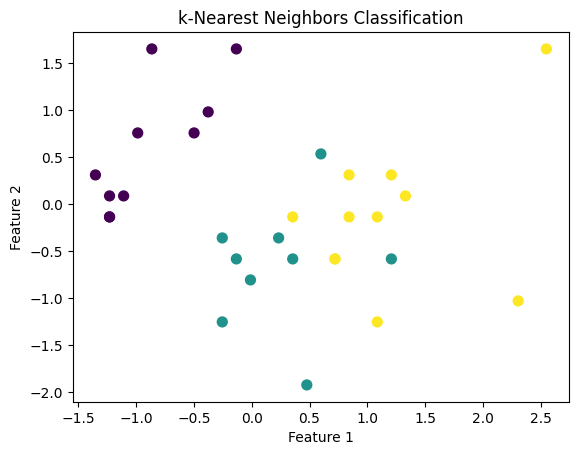

In [5]:
# Testing case
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    import matplotlib.pyplot as plt

    iris = load_iris()
    X, y = iris.data, iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"Accuracy: {accuracy}")

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.title("k-Nearest Neighbors Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()